<a name = "inicio"></a>
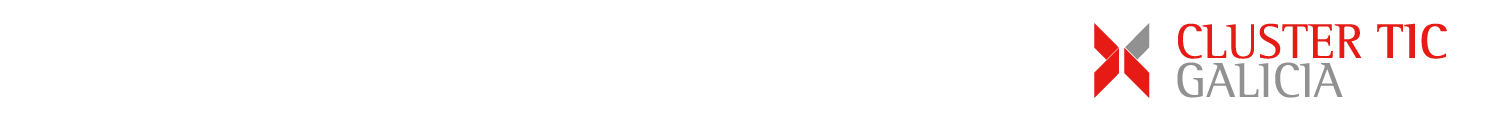

<div style="font-size: 50px;text-align: center;height:70px;padding:10px;margin:10px 0 0 0;">Modelos estadísticos</div>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
tips = sns.load_dataset("tips")

Además de ser capaces de visualizar la distribución de una o dos variables simultáneamente, o la relación entre variables cuantitativas y cualitativas, en ocasiones será también de extremada utilidad poder aplicar sencillos modelos estadísticos que pongan de manifiesto patrones en los conjuntos de datos siendo analizados.

Seaborn ofrece una función a nivel de figura con este objetivo: [seaborn.lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html). En su forma más simple, esta función muestra un diagrama de dispersión, entrena un modelo de regresión lineal $y ~ x$, y muestra la recta de regresión resultante y el intervalo de confianza del 95% correspondiente.

La función a nivel de ejes equivalente es [seaborn.regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html), función que no incluye más que un subconjunto de la funcionalidad ofrecida por la primera.

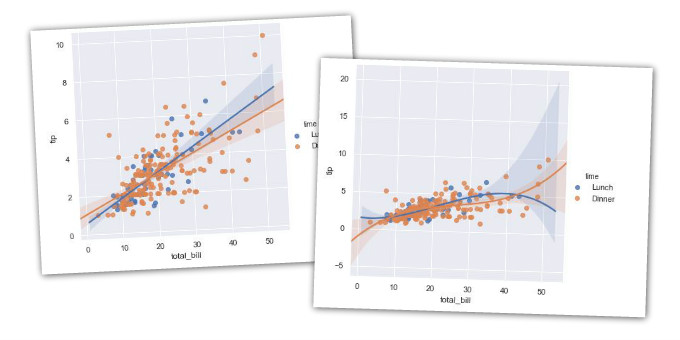

### Regresiones lineales

Veamos un ejemplo de uso sencillo de la función [seaborn.lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html):

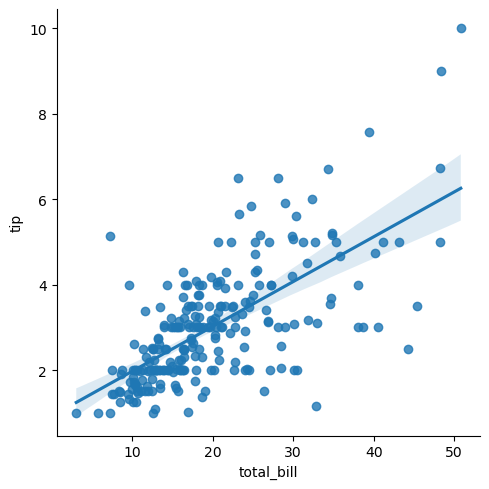

In [4]:
sns.lmplot(data = tips, x = "total_bill", y = "tip")
plt.show()

La función, tal y como esperábamos, ha entrenado un sencillo modelo de regresión lineal y ha mostrado la recta de regresión y el intervalo de confianza del 95%. Todo esto nos permite tener una idea más clara de la relación entre las variables en análisis.

Podemos utilizar el parámetro **hue** para separar nuestro conjunto de datos según los valores que tome una variable categórica, y mostrar los puntos correspondientes a cada grupo con colores distintos y con una recta de regresión para cada uno de ellos:

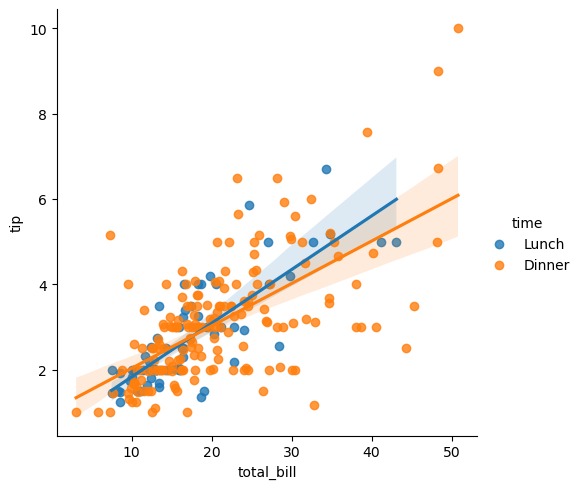

In [5]:
sns.lmplot(data = tips, x = "total_bill", y = "tip", hue = "time")
plt.show()

# Valores residuales

Una función que puede resultar muy útil es [seaborn.residplot](https://seaborn.pydata.org/generated/seaborn.residplot.html). Esta función -a nivel de ejes- entrena el modelo de regresión lineal y muestra en la gráfica los valores residuales para cada una de las observaciones. Mostremos el modelo de regresión lineal:

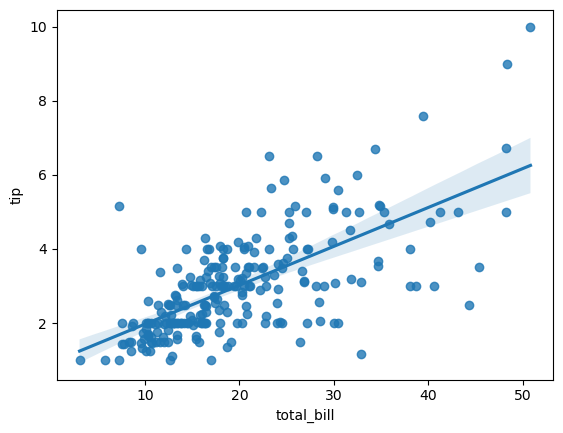

In [6]:
sns.regplot(data = tips, x = "total_bill", y = "tip")
plt.show()

Y mostremos ahora los valores residuales usando la función *seaborn.residplot()*:

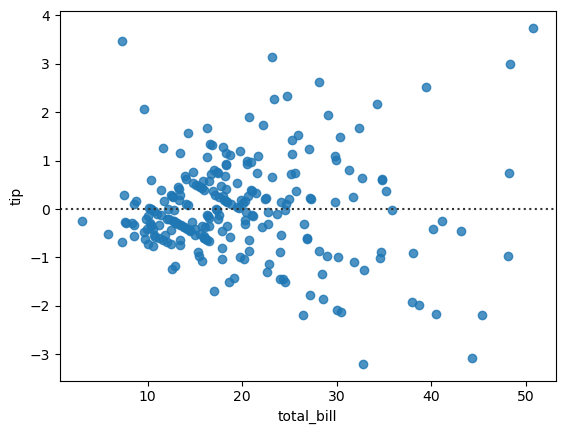

In [7]:
sns.residplot(data = tips, x = "total_bill", y = "tip")
plt.show()

Vemos que la función ha situado la recta de regresión horizontalmente y muestra el punto correspondiente a cada observación a la distancia que lo separa de dicha recta.

# Regresiones polinomiales

A pesar del nombre de la función (*lmplot = linear model plot*), también es posible utilizarla para entrenar un modelo de regresión polinomial, lo que se consigue añadiendo el parámetro **order** y estableciéndolo al orden del polinomio deseado. Si este parámetro toma el valor 2 o superior, la función *sns.lmplot()* ejecuta la función [numpy.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) para entrenar el modelo:

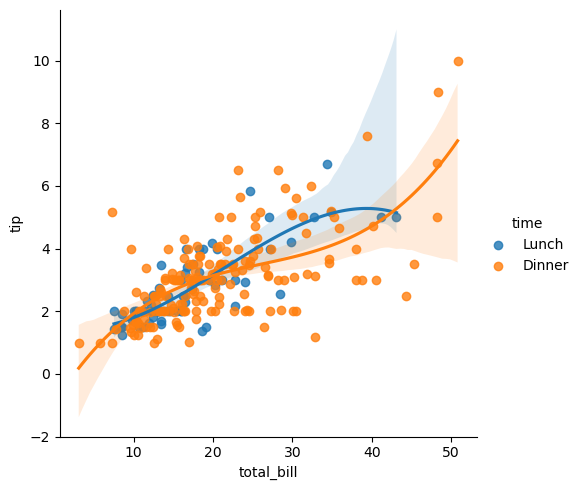

In [8]:
sns.lmplot(data = tips, x = "total_bill", y = "tip", hue = "time", order = 3)
plt.show()

# Regresiones logísticas

La **regresión logística** es un tipo de análisis utilizado para predecir el resultado de una variable categórica binaria en función de un conjunto de variables independientes. Puede obtenerse en Seaborn añadiendo el argumento *logistic = True* a la función [seaborn.lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html) (o a [seaborn.regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html)).

Por ejemplo, supongamos que deseamos saber la probabilidad de que el comensal que deja la propina sea un hombre en función del total de la cuenta. Con este fin, añadimos una nueva característica booleana indicando si el comensal es o no hombre:

In [9]:
tips["is_male"] = tips["sex"] == "Male"
tips.head()

,total_bill,tip,sex,smoker,day,time,size,is_male
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,False


A continuación ejecutamos la función *seaborn.lmplot()* mostrando en el eje $y$ el campo creado, *is_male*, y añadiendo el argumento *logistic = True*:

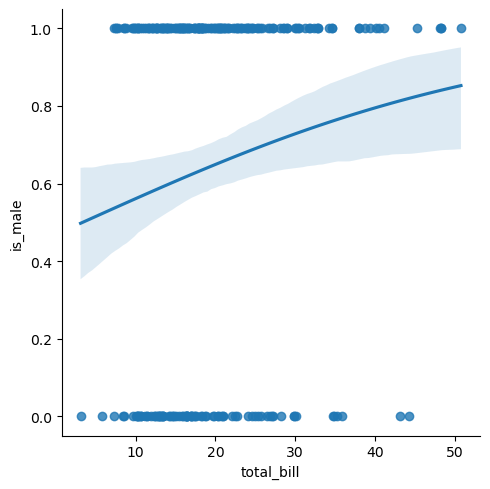

In [10]:
sns.lmplot(data = tips, x = "total_bill", y = "is_male", logistic = True)
plt.show()

La función muestra la regresión logística buscada y el intervalo de confianza.

Vemos cómo se han representado los puntos correspondientes a los valores *False* y *True* (interpretados como 0 y 1, respectivamente), pero los puntos están tan próximos unos a otros que resulta difícil distinguirlos. Las funciones *sns.lmplot* y *sns.regplot* admiten dos parámetros que pueden ser de utilidad en casos como éste: **x_jitter** e **y_jitter**. El primero añade un cierto "temblor" horizontal a los puntos, y el segundo un cierto temblor vertical. Si repetimos la visualización anterior añadiendo el parámetro *y_jitter*, el resultado es el siguiente:

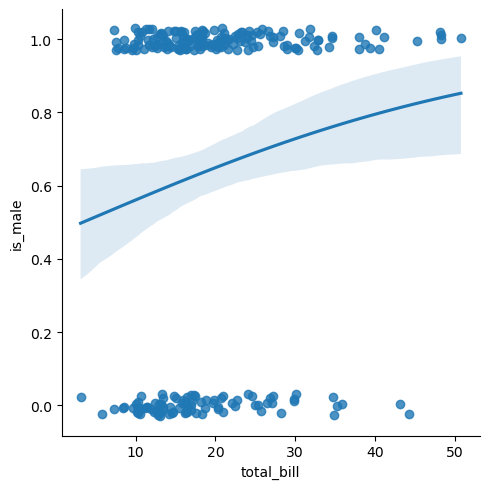

In [11]:
sns.lmplot(data = tips, x = "total_bill", y = "is_male", logistic = True, y_jitter = 0.03)
plt.show()

Esta función no tiene un parámetro que permita controlar directamente el tamaño de los puntos. Podríamos hacerlo a través del parámetro **scatter_kws**:

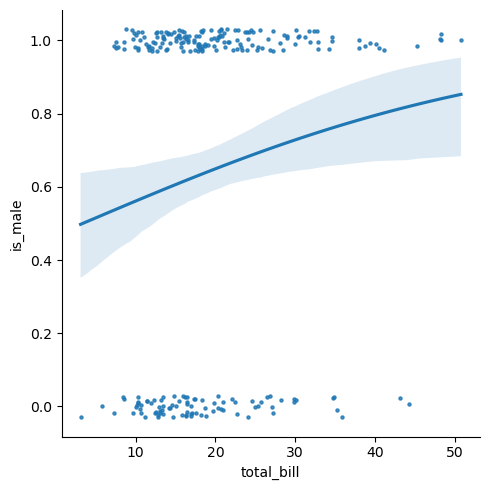

In [12]:
sns.lmplot(
    data = tips,
    x = "total_bill",
    y = "is_male",
    logistic = True,
    y_jitter = 0.03,
    scatter_kws = {"s": 5}
)
plt.show()

# Regresiones en otros contextos

No solo podemos mostrar rectas de regresión con las funciones vistas [seaborn.lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html) y [seaborn.regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html). También es posible añadirlas a otras funciones:

#### seaborn.jointplot

Esta función, como ya sabemos, muestra, por defecto, un diagrama de dispersión de dos variables e histogramas independientes para cada una de ellas. Pues bien, añadiendo el argumento *kind = "reg"* conseguimos que se entrene un modelo lineal para dichas variables y se muestre en la gráfica:

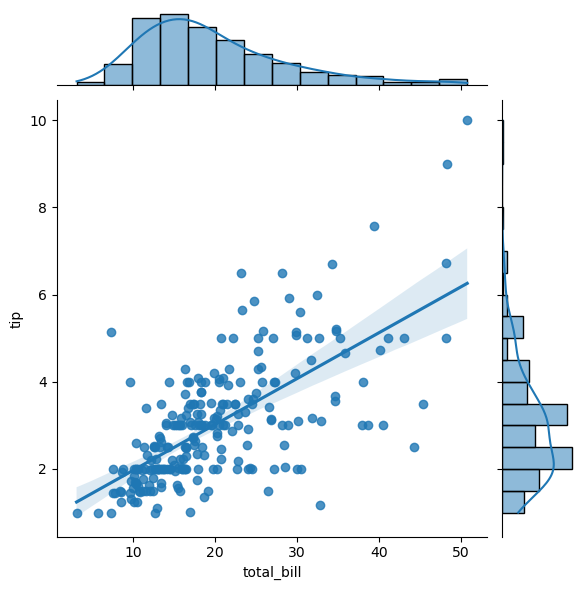

In [13]:
sns.jointplot(data = tips, x = "total_bill", y = "tip", kind = "reg")
plt.show()

#### seaborn.pairplot

En esta función, el uso del mismo argumento, *kind = "reg"*, genera rectas de regresión en todos los diagramas de dispersión de la visualización. Si, como en el siguiente ejemplo, se están dividiendo los datos según alguna variable categórica mediante el uso del parámetro **hue**, se genera una recta de regresión para cada grupo de datos:

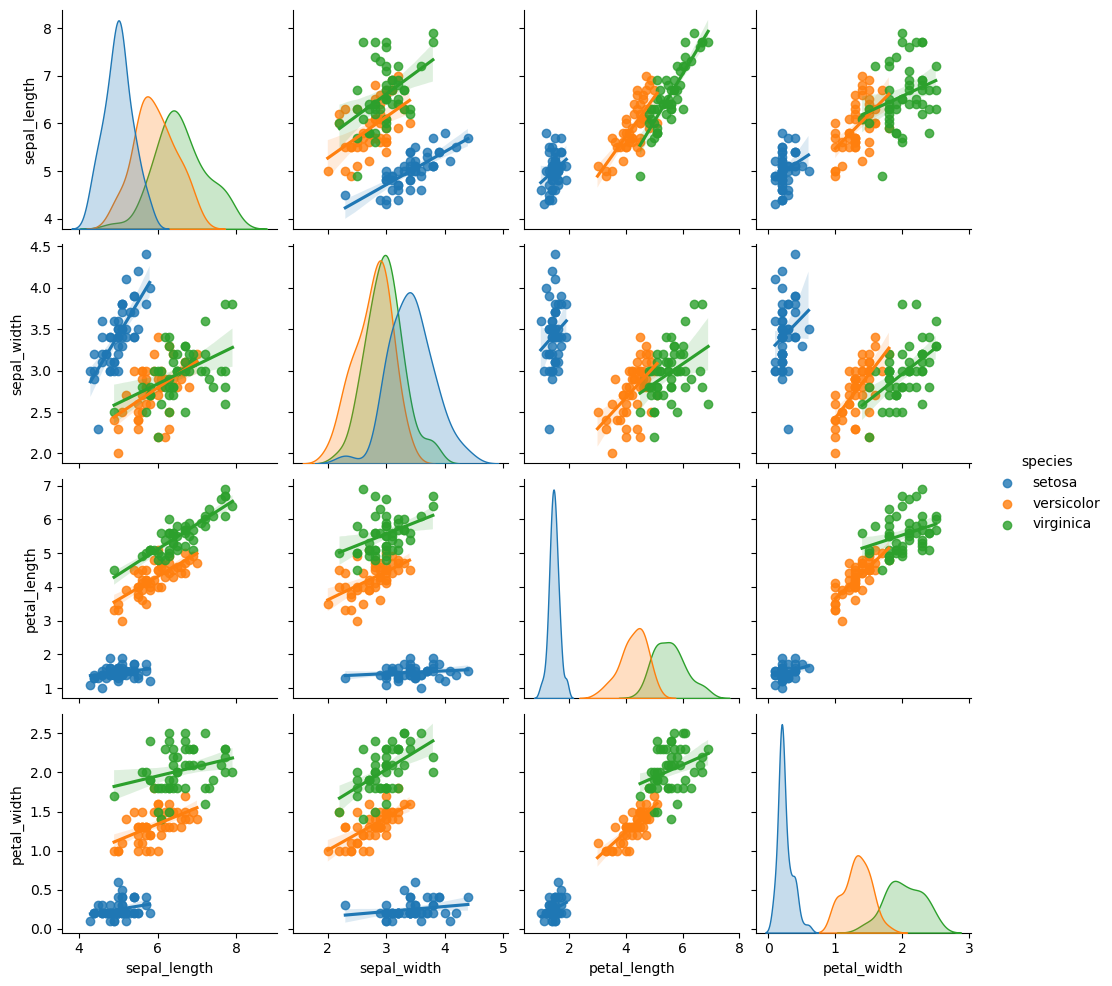

In [14]:
iris = sns.load_dataset("iris")
sns.pairplot(data = iris, hue = "species", kind = "reg")
plt.show()

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>